<a href="https://colab.research.google.com/github/Safayat777/my_new/blob/main/my_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
# Set seeds for reproducibility
import random
random.seed(0)
import numpy as np
np.random.seed(0)
import tensorflow as tf
tf.random.set_seed(0)

In [49]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [50]:
kaggle_credentails = json.load(open("kaggle.json"))

In [51]:
# setup Kaggle API key as environment variables
os.environ['KAGGLE_USERNAME'] = kaggle_credentails["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentails["key"]

In [52]:
print(os.listdir(base_dir))
print(len(os.listdir(base_dir)))
print(os.listdir(base_dir)[:5])

['infected', 'not_infected']
2
['infected', 'not_infected']


In [53]:
# Dataset Path
base_dir = '/content/drive/MyDrive/DataSet/ArsenicSkinImageBD'

(244, 244, 3)


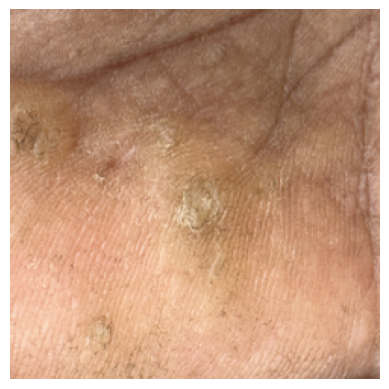

In [32]:
image_path = '/content/drive/MyDrive/DataSet/infected.png'

# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [33]:
image_path = '/content/drive/MyDrive/DataSet/infected.png'

# Read the image
img = mpimg.imread(image_path)

print(img)

[[[0.70980394 0.5372549  0.44705883]
  [0.7294118  0.56078434 0.4627451 ]
  [0.7176471  0.5411765  0.45490196]
  ...
  [0.64705884 0.5137255  0.4392157 ]
  [0.6509804  0.5137255  0.4392157 ]
  [0.5921569  0.44705883 0.36862746]]

 [[0.69803923 0.5254902  0.43529412]
  [0.74509805 0.5803922  0.47843137]
  [0.73333335 0.5647059  0.47058824]
  ...
  [0.6313726  0.49019608 0.41568628]
  [0.6156863  0.46666667 0.3882353 ]
  [0.58431375 0.44313726 0.3647059 ]]

 [[0.7058824  0.5411765  0.44705883]
  [0.70980394 0.5372549  0.44313726]
  [0.7254902  0.5568628  0.4627451 ]
  ...
  [0.6        0.44313726 0.3647059 ]
  [0.60784316 0.45490196 0.37254903]
  [0.63529414 0.49411765 0.4117647 ]]

 ...

 [[0.8666667  0.6431373  0.5294118 ]
  [0.8666667  0.64705884 0.53333336]
  [0.84705883 0.6313726  0.52156866]
  ...
  [0.5372549  0.39215687 0.32156864]
  [0.56078434 0.41960785 0.34901962]
  [0.5764706  0.4392157  0.37254903]]

 [[0.84705883 0.62352943 0.5058824 ]
  [0.85490197 0.6392157  0.52156866]


In [34]:
# Image Parameters
img_size = 224
batch_size = 32

In [35]:
# Image Data Generators
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)

In [36]:
# Train Generator
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 7114 images belonging to 2 classes.


In [37]:
# Validation Generator
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 1778 images belonging to 2 classes.


In [38]:
# Model Definition
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))
model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))


model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

In [39]:
# model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 186624)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │    47,776,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 2)              │           514 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,795,906 (182.33 MB)

 Trainable params: 47,795,906 (182.33 MB)

 Non-trainable params: 0 (0.00 B)

In [40]:
# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [41]:
# Training the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=10,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  # Validation steps
)

Epoch 1/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 155s 264ms/step - accuracy: 0.6198 - loss: 2.1841 - val_accuracy: 0.6358 - val_loss: 0.6269
Epoch 2/10
  1/222 ━━━━━━━━━━━━━━━━━━━━ 14s 66ms/step - accuracy: 0.6562 - loss: 0.6535

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


222/222 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - accuracy: 0.6562 - loss: 0.6535 - val_accuracy: 0.6182 - val_loss: 0.6265
Epoch 3/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 142s 468ms/step - accuracy: 0.6967 - loss: 0.5730 - val_accuracy: 0.6568 - val_loss: 0.7002
Epoch 4/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 10s 44ms/step - accuracy: 0.6875 - loss: 0.5435 - val_accuracy: 0.6659 - val_loss: 0.6984
Epoch 5/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 52s 233ms/step - accuracy: 0.7072 - loss: 0.5398 - val_accuracy: 0.7159 - val_loss: 0.9675
Epoch 6/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 9s 42ms/step - accuracy: 0.7812 - loss: 0.4311 - val_accuracy: 0.6608 - val_loss: 1.1012
Epoch 7/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 83s 278ms/step - accuracy: 0.7389 - loss: 0.4860 - val_accuracy: 0.7477 - val_loss: 1.0741
Epoch 8/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 10s 45ms/step - accuracy: 0.6875 - loss: 0.4572 - val_accuracy: 0.7341 - val_loss: 1.0355
Epoch 9/10
222/222 ━━━━━━━━━━━━━━━━━━━━ 51s 228ms/step - accuracy: 0.7626 - loss: 0.4583 - val_acc

In [42]:
# Model Evaluation
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
55/55 ━━━━━━━━━━━━━━━━━━━━ 10s 180ms/step - accuracy: 0.7272 - loss: 1.5497
Validation Accuracy: 73.58%


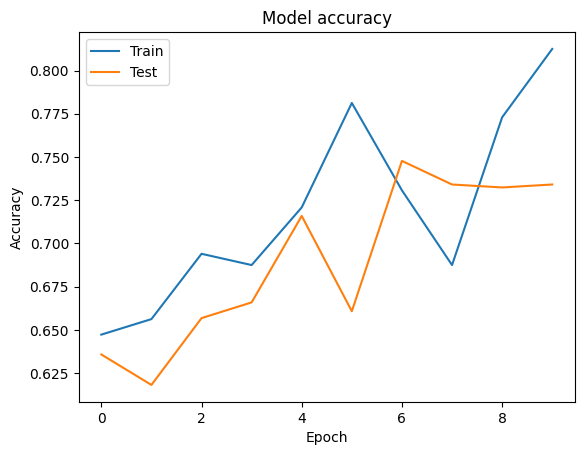

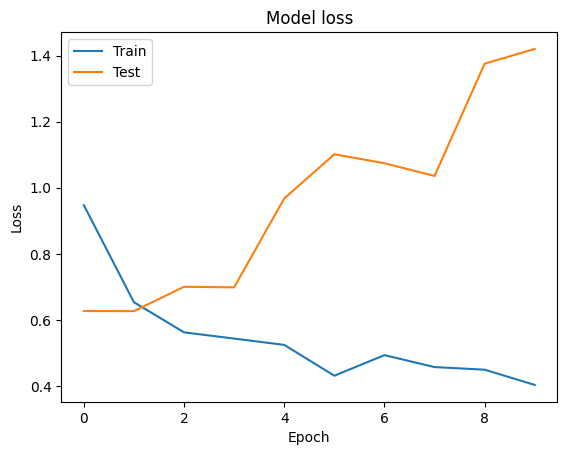

In [43]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [44]:
# Function to Load and Preprocess the Image using Pillow
def load_and_preprocess_image(image_path, target_size=(224, 224)):
    # Load the image
    img = Image.open(image_path)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [45]:
# Create a mapping from class indices to class names
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [46]:
# saving the class names as json file
json.dump(class_indices, open('class_indices.json', 'w'))

In [48]:
# Example Usage
image_path = '/content/drive/MyDrive/DataSet/infected.png'
# image_path = '/content/drive/MyDrive/DataSet/non_infected.png'

predicted_class_name = predict_image_class(model, image_path, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
Predicted Class Name: infected
